In [16]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Entrega Acotamiento de Distribuciones  
**El Acotamiento de Distribuciones: Fundamentos, Aplicaciones y Ejemplos**


# ¿Qué es el acotamiento de distribuciones?

El **acotamiento de distribuciones** se refiere a las características de aquellas distribuciones de probabilidad cuyos valores posibles están limitados o “acotados” dentro de un intervalo específico.  
En términos matemáticos, una distribución está acotada cuando existe un valor mínimo (cota inferior) y/o un valor máximo (cota superior) que la variable aleatoria no puede superar.


## Existen distintas tecnicas de truncamiento

- valores absolutos
- desviaciones estandar
- valores esperados

en este documento se explicará a detalle cada una de ellas


### Truncamiento por valores absolutos

El truncamiento por valores absolutos es una técnica matemática utilizada para restringir los valores de una variable dentro de un rango determinado, eliminando cualquier valor que exceda un umbral máximo o mínimo predefinido. Es común en estadísticas, procesamiento de señales, aprendizaje automático y economía para evitar valores extremos o atípicos que puedan distorsionar análisis o modelos.

¿Cómo funciona?
Dado un conjunto de datos o una función \( x \), se define un umbral superior \( U \) y un umbral inferior \( L \). Si un valor \( x \) es mayor que \( U \), se sustituye por \( U \), y si es menor que \( L \), se sustituye por \( L \). Si está dentro del rango, permanece igual.

Matemáticamente, el truncamiento por valores absolutos se expresa como:

\[ x_{\text{truncado}} = \begin{cases} 
L, & \text{si } x < L \\
x, & \text{si } L \leq x \leq U \\
U, & \text{si } x > U 
\end{cases} \]

Donde:

- \( L \) es el límite inferior.
- \( U \) es el límite superior.

#### Ejemplo de truncamiento por valores absolutos para datos continuos

##### 1. Entradas conocidas

In [17]:
data_continua = np.random.normal(loc=50, scale=10, size=1000)

##### 2. Calculos Intermedios

In [18]:
def truncate_values(data, lower_bound, upper_bound):
    return np.clip(data, lower_bound, upper_bound)

truncated_continua = truncate_values(data_continua, 30, 70)

##### 3. Salida y analisis

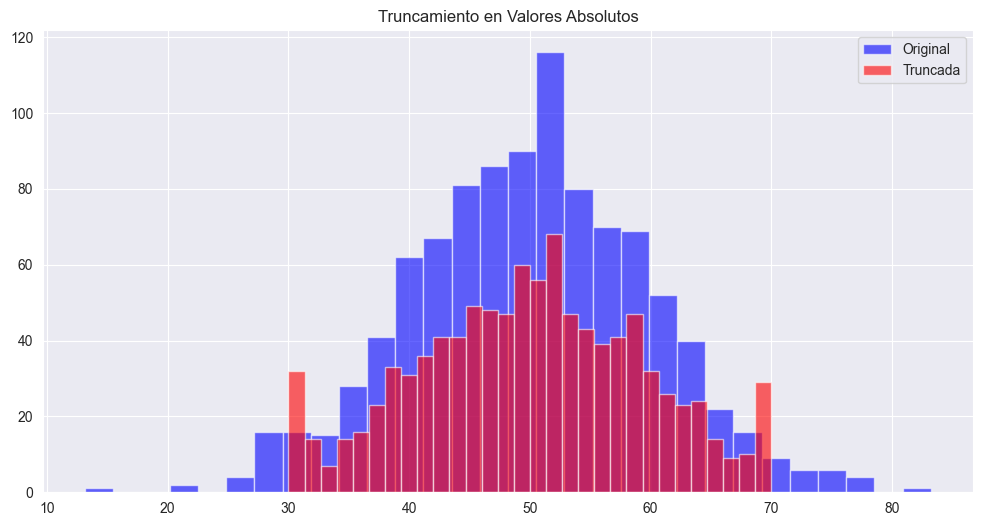

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(data_continua, bins=30, alpha=0.6, color='b', label='Original')
plt.hist(truncated_continua, bins=30, alpha=0.6, color='r', label='Truncada')
plt.title('Truncamiento en Valores Absolutos')
plt.legend()
plt.show()

#### Ejemplo de truncamiento por valores absolutos para datos discretos

##### 1. Entradas conocidas

In [20]:
data_discreta = np.random.randint(1, 100, 1000)

##### 2. Calculos Intermedios

In [21]:
truncated_discreta = truncate_values(data_discreta, 30, 70)

##### 3. Salida y analisis

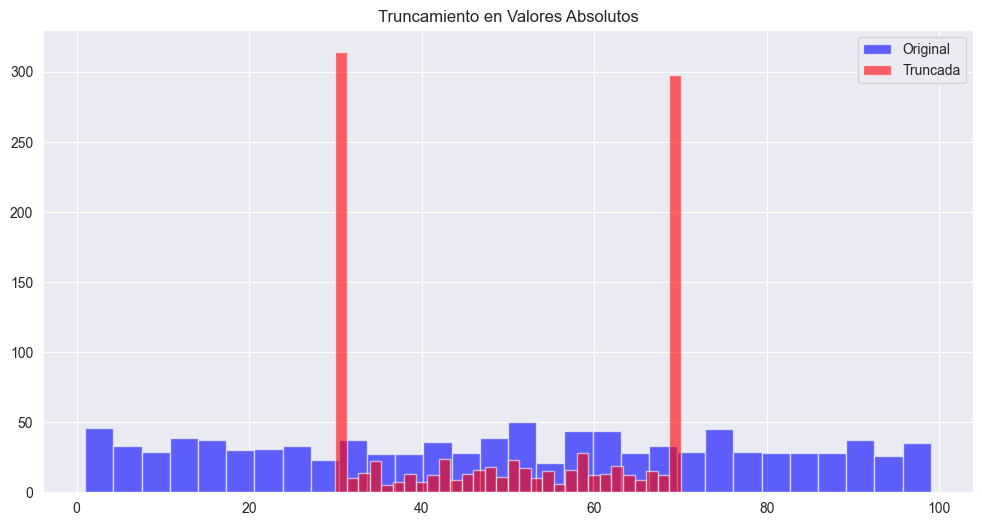

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(data_discreta, bins=30, alpha=0.6, color='b', label='Original')
plt.hist(truncated_discreta, bins=30, alpha=0.6, color='r', label='Truncada')
plt.title('Truncamiento en Valores Absolutos')
plt.legend()

### Truncamiento por desviaciones estándar

El truncamiento por desviaciones estándar es una técnica estadística utilizada para eliminar o ajustar valores atípicos (outliers) en un conjunto de datos. Se basa en la distribución normal, asumiendo que la mayoría de los datos estarán dentro de un cierto rango de desviaciones estándar respecto a la media.

## ¿Cómo funciona?

Se define un umbral basado en la media (\( \mu \)) y la desviación estándar (\( \sigma \)) del conjunto de datos. Cualquier valor que se encuentre fuera de un rango específico de desviaciones estándar se puede truncar o eliminar.

La fórmula para definir los límites de truncamiento es:

\[ L = \mu - k\sigma \]

\[ U = \mu + k\sigma \]

Donde:

- \( L \) es el límite inferior.
- \( U \) es el límite superior.
- \( k \) es el número de desviaciones estándar que se consideran aceptables (típicamente 2 o 3).
- \( \mu \) es la media del conjunto de datos.
- \( \sigma \) es la desviación estándar.

### Modos de Truncamiento

#### Eliminación de valores fuera del rango
Se descartan los datos que están por debajo de \( L \) o por encima de \( U \).

#### Ajuste de valores fuera del rango
Se reemplazan los valores extremos por los límites \( L \) y \( U \).

¿Cuándo usarlo?
Cuando los datos siguen una distribución aproximadamente normal.
En modelos de Machine Learning para reducir la influencia de outliers sin eliminar información relevante.
En finanzas y economía, para tratar valores atípicos en series de tiempo y hacer análisis más robustos.

### Ejemplo de truncamiento por desviaciones estándar para distribuciones continuas

##### 1. Entradas conocidas siguen sendo los mismos datos continuos

##### 2. Calculos Intermedios

In [23]:
def truncate_sd(data, num_sd):
    mean = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean - num_sd * std_dev
    upper_bound = mean + num_sd * std_dev
    return truncate_values(data, lower_bound, upper_bound)

truncated_sd_continua = truncate_sd(data_continua, 2)

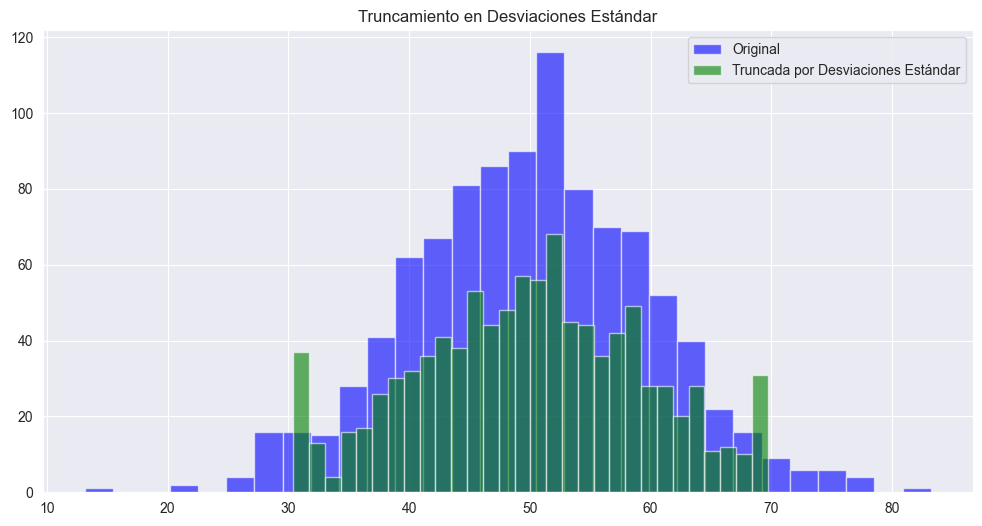

In [24]:
# Graficar
plt.figure(figsize=(12, 6))
plt.hist(data_continua, bins=30, alpha=0.6, color='b', label='Original')
plt.hist(truncated_sd_continua, bins=30, alpha=0.6, color='g', label='Truncada por Desviaciones Estándar')
plt.title('Truncamiento en Desviaciones Estándar')
plt.legend()
plt.show()

### Ejemplo de truncamiento por desviaciones estándar para distribuciones discretas


##### 1. Entradas conocidas siguen sendo los mismos datos discretos


##### 2. Calculos Intermedios

In [25]:
def truncate_sd_discrete(data, num_sd):

    mean = np.mean(data)
    std_dev = np.std(data)

    # Definir límites y redondearlos para datos discretos
    lower_bound = round(mean - num_sd * std_dev)
    upper_bound = round(mean + num_sd * std_dev)

    # Truncar valores fuera del rango
    truncated_data = np.array([x for x in data if lower_bound <= x <= upper_bound])

    return truncated_data


In [26]:
truncated_sd_discrete = truncate_sd_discrete(data_discreta, 2)

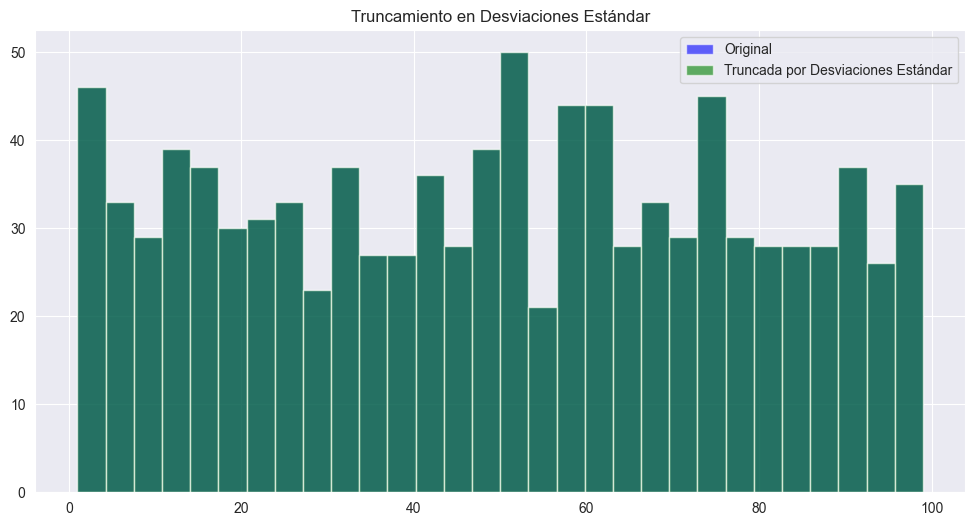

In [27]:
plt.figure(figsize=(12, 6))
plt.hist(data_discreta, bins=30, alpha=0.6, color='b', label='Original')
plt.hist(truncated_sd_discrete, bins=30, alpha=0.6, color='g', label='Truncada por Desviaciones Estándar')
plt.title('Truncamiento en Desviaciones Estándar')
plt.legend()
plt.show()

### Truncamiento por Percentiles

El truncamiento por percentiles es una técnica utilizada para eliminar o ajustar valores extremos en un conjunto de datos, basándose en su distribución percentil. Se usa ampliamente en estadística, ciencia de datos y machine learning para tratar valores atípicos.

## ¿Cómo funciona?

Se eligen dos percentiles como límites:

- **Límite inferior**: Percentil \( P_{\text{min}} \) (por ejemplo, el 5\%).
- **Límite superior**: Percentil \( P_{\text{max}} \) (por ejemplo, el 95\%).

Los valores que estén por debajo del percentil inferior se eliminan o ajustan al valor de dicho percentil. Los valores que estén por encima del percentil superior se eliminan o ajustan al valor de dicho percentil.

Matemáticamente, si \( P_{\text{min}} \) y \( P_{\text{max}} \) son los valores correspondientes a los percentiles definidos, el truncamiento se expresa como:

### Ejemplo de truncamiento por percentil para distribuciones discretas

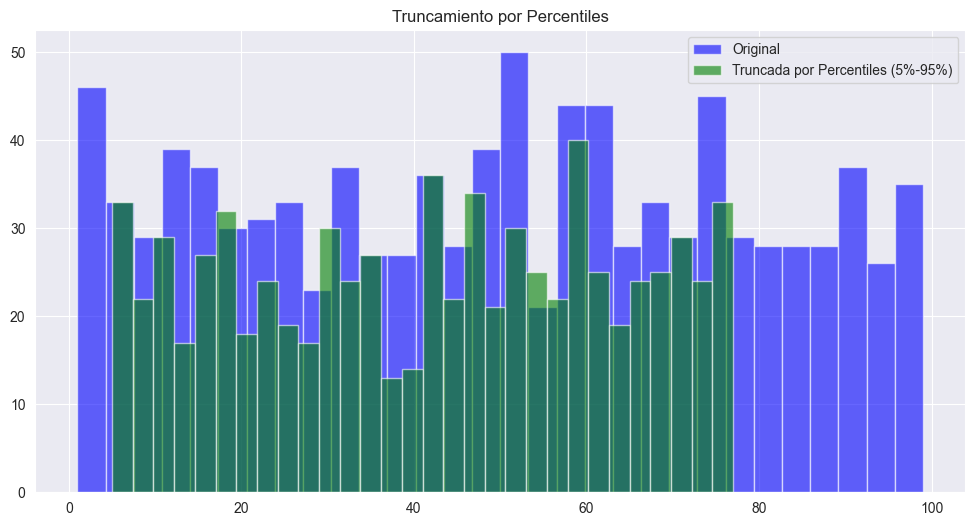

In [29]:
def truncate_percentile_discrete(data, lower_percentile, upper_percentile):
    """
    Aplica truncamiento por percentiles en datos discretos.

    Parámetros:
    - data: array-like, conjunto de datos (valores discretos).
    - lower_percentile: percentil inferior (ej. 5 para el 5%).
    - upper_percentile: percentil superior (ej. 95 para el 95%).

    Retorna:
    - Un array con los valores truncados de manera discreta.
    """
    lower_bound = round(np.percentile(data, lower_percentile))
    upper_bound = round(np.percentile(data, upper_percentile))

    # Truncar valores fuera del rango
    truncated_data = np.array([x for x in data if lower_bound <= x <= upper_bound])

    return truncated_data


truncated_percentile_discrete = truncate_percentile_discrete(data_discreta, 5, 80)

plt.figure(figsize=(12, 6))
plt.hist(data_discreta, bins=30, alpha=0.6, color='b', label='Original')
plt.hist(truncated_percentile_discrete, bins=30, alpha=0.6, color='g', label='Truncada por Percentiles (5%-95%)')
plt.title('Truncamiento por Percentiles')
plt.legend()
plt.show()

### Ejemplo de truncamiento por percentil para distribuciones continuas